### Performance Metrics
1. Accuracy
2. Precision
-> for precision we draw the confusion matrix, and look for predicted +ve values
    - y axis : actual -ve, actual +ve
    - x axis : predicted -ve, predicted +ve
    - precision is what fraction of +ve predictions are correct ? 
    ie. **True +ve /(True +ve + False +ve)**
3. Recall
-> in confusion matrix, we will now look for actual positive values
    - **True +ve/( True +ve + False -ve)**
    
-> Ideally we would want high precision and high recall

## Ways for Classifier Evaluation
-Train Test Split 
    - Note: Kaggle demands as the o/p to the train.csv that they give, So we can split the train.csv into two portions ( training data and test data )

-> Build a **BaseLine model** first
    - we can assess the performance of any subsequent model that we create
    - In Classification, Baseline model will give output of majority class
        - BaseLine model accuracy can also be calculated
        

In [4]:
import pandas as pd
import os
import numpy as np


In [5]:
# Import Data
processed_data_path = os.path.join(os.path.pardir,'data','processed')
train_file_path = os.path.join(processed_data_path,'train.csv')
test_file_path = os.path.join(processed_data_path,'test.csv')

In [6]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [7]:
train_df.info()
# survived is the o/p label

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 33 columns):
Survived              891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int64
IsMale                891 non-null int64
Deck_A                891 non-null int64
Deck_B                891 non-null int64
Deck_C                891 non-null int64
Deck_D                891 non-null int64
Deck_E                891 non-null int64
Deck_F                891 non-null int64
Deck_G                891 non-null int64
Deck_Z                891 non-null int64
Pclass_1              891 non-null int64
Pclass_2              891 non-null int64
Pclass_3              891 non-null int64
Title_Lady            891 non-null int64
Title_Master          891 non-null int64
Title_Miss            891 non-null int64
Title_Mr              891 non-null int64
Title_Mrs             891 non-

### Data Preparation

In [8]:
X = train_df.loc[:,'Age':].as_matrix().astype('float')
y = train_df['Survived'].ravel() # convert to 1-D array

In [9]:
print(X.shape,y.shape)


(891, 32) (891,)


### Note : X is capital to denote a matrix and y is small to denote 1-Dimensional vector

In [10]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state =0)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)
# random state is seed value for randomization

(712, 32) (712,)
(179, 32) (179,)


In [11]:
# average survival in train and test
print("mean survival in train :{0:.3f}".format(np.mean(y_train)))
print("mean survival in test : {0:.3f}".format(np.mean(y_test)))

mean survival in train :0.383
mean survival in test : 0.385


In [12]:
#1. we can see that both test and train data have similar amount of 
    # positive classes
#2. One problem is there for imbalanced class ie. 38 % +ve class and rest -ve class
    # we will not look into it much now
    
# example : marketing dataset problem: conversion rate is 2-3% .'. diff approach for that problem

#### Check scikit-learn version

In [13]:
import sklearn

In [14]:
sklearn.__version__
# it should be greater than 0.19
# !conda update -y scikit-learn

'0.19.1'

### Baseline Model
- we will use DummyClassifier here

In [1]:
from sklearn.dummy import DummyClassifier


In [2]:
# create model
model_dummy = DummyClassifier(strategy='most_frequent',random_state = 0)

In [3]:
# train model
model_dummy.fit(X_train,y_train)

NameError: name 'X_train' is not defined

In [ ]:
print("score for baseline model : {0:.2f}".format(model_dummy.score(X_test,y_test)))
# score will give the mean accuracy on test dataset
    # for multiclass it is subset accuracy
# in score model will predict on x_test and compare o/p on y_test

In [21]:
# explicitly get performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score , recall_score
# accuracy score
print("accuracy for baseline model :{0:.2f}".format(accuracy_score(y_test,model_dummy.predict(X_test))))

accuracy for baseline model :0.61


In [23]:
# confusion matrix
print("confusion matrix : \n{0}".format(confusion_matrix(y_test,model_dummy.predict(X_test))))

confusion matrix : 
[[110   0]
 [ 69   0]]


In [26]:
# precision and recall 
print("precision matrix : \n{0}".format(precision_score(y_test,model_dummy.predict(X_test))))
print("recall matrix : \n{0}".format(recall_score(y_test,model_dummy.predict(X_test))))

precision matrix : 
0.0
recall matrix : 
0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## First Kaggle Submission

In [27]:
# converting to the matrix
test_X = test_df.as_matrix().astype('float')

In [28]:
# get predictions
predictions = model_dummy.predict(test_X)

In [29]:
df_submission = pd.DataFrame({'PassengerId': test_df.index,'Survived':predictions})

In [30]:
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [31]:
submission_data_path = os.path.join(os.path.pardir,'data','external')
submission_file_path = os.path.join(submission_data_path,'01_dummy.csv')

In [32]:
df_submission.to_csv(submission_file_path,index=False)

In [91]:
def get_submission_file(model,filename):
    # converting to the matrix
    test_X = test_df.as_matrix().astype('float')
    predictions = model.predict(test_X)
    df_submission = pd.DataFrame({'PassengerId': test_df.index,'Survived':predictions})
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path,filename)
    df_submission.to_csv(submission_file_path,index=False)

In [36]:
get_submission_file(model_dummy,'01_dummy.csv')

### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression
model_lr_1 = LogisticRegression(random_state =0)
model_lr_1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
print("score for logistic regression - version 1 :{0:.2f}".format(model_lr_1.score(X_test,y_test)))

score for logistic regression - version 1 :0.83


In [46]:
# precision and recall 
print("accuracy for baseline model :{0:.2f}".format(accuracy_score(y_test,model_lr_1.predict(X_test))))
print("confusion matrix : \n{0}".format(confusion_matrix(y_test,model_lr_1.predict(X_test))))
print("precision matrix : \n{0}".format(precision_score(y_test,model_lr_1.predict(X_test))))
print("recall matrix : \n{0}".format(recall_score(y_test,model_lr_1.predict(X_test))))

accuracy for baseline model :0.83
confusion matrix : 
[[95 15]
 [15 54]]
precision matrix : 
0.782608695652174
recall matrix : 
0.782608695652174


In [47]:
model_lr_1.coef_

array([[-0.02842271,  0.00455452, -0.50009094,  0.61781308, -0.81392328,
         0.1284508 , -0.1728179 , -0.39317831,  0.52159971,  1.09941224,
         0.40341218, -0.1834505 , -0.30036038,  0.96533485,  0.48256742,
        -0.34483445,  0.28089581,  1.21761324,  0.56363966, -1.445863  ,
         1.07245564, -0.11273703, -0.47293649,  0.28009462,  0.2471692 ,
         0.41324761,  0.1625564 ,  0.4918353 ,  0.46198829,  0.14924424,
         0.3728352 ,  0.73023263]])

### 2nd submission

In [49]:
get_submission_file(model_lr_1,"01_lr.csv")

## ------------ ML2 -----------------

In [19]:
# PART 2
model_lr = LogisticRegression(random_state=0)
from sklearn.model_selection import GridSearchCV

C_param = np.linspace(0.001, 1000, 1000)

params = {'C':list(C_param), 'penalty':['l1','l2']}

In [59]:
clf = GridSearchCV(model_lr, param_grid=params, cv=3,n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 1.002, 2.003, 3.004, 4.005000000000001, 5.006000000000001, 6.007000000000001, 7.008000000000001, 8.009, 9.01, 10.011000000000001, 11.012, 12.013, 13.014000000000001, 14.015, 15.016000000000002, 16.017000000000003, 17.018000000000004, 18.019000000000002, 19.020000000000003, 2... 995.9960000000001, 996.9970000000001, 997.998, 998.9990000000001, 1000.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [60]:
clf.best_params_

{'C': 1.002, 'penalty': 'l1'}

In [61]:
print("best score : {0:.2f}".format(clf.best_score_))

# evalute model
print("score for log reg v2 : {0:.2f}".format(clf.score(X_test, y_test)))

best score : 0.83
score for log reg v2 : 0.83


In [62]:
get_submission_file(clf,'03_lr.csv')

### Feature Standardization and Standardization
- Minmax scalar for normalization
- Standard Scaler for standardization

In [20]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
ss = StandardScaler()

In [21]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [22]:
clf = GridSearchCV(model_lr, param_grid=params, cv=3,n_jobs=-1)
clf.fit(X_train_scaled, y_train)
print(clf.best_params_)


{'C': 1.002, 'penalty': 'l1'}


In [68]:
print("best score : {0:.2f}".format(clf.best_score_))

# evalute model
print("score for log reg v2 : {0:.2f}".format(clf.score(X_test_scaled, y_test)))
get_submission_file(clf,'scaled_lr.csv')

# for log reg, standardization may not add value

best score : 0.81
score for log reg v2 : 0.84


### Model persistence

In [70]:
import pickle

# create file path
model_file_path = os.path.join(os.path.pardir,'models','lr_model.pkl')
scaler_file_path = os.path.join(os.path.pardir,'models','lr_scaler.pkl')

# open the files to write
model_file_pickle = open(model_file_path,'wb')
scaler_file_pickle = open(scaler_file_path,'wb')
# wb: write binary

pickle.dump(clf, model_file_pickle)
pickle.dump(ss, scaler_file_pickle)

model_file_pickle.close()
scaler_file_pickle.close()

In [72]:
# load persisited file
model_file_pickle = open(model_file_path,'rb')
scaler_file_pickle = open(scaler_file_path,'rb')

clf_loaded = pickle.load(model_file_pickle)
scaler_loaded = pickle.load(scaler_file_pickle)

model_file_pickle.close()
scaler_file_pickle.close()

In [73]:
clf_loaded

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.001, 1.002, 2.003, 3.004, 4.005000000000001, 5.006000000000001, 6.007000000000001, 7.008000000000001, 8.009, 9.01, 10.011000000000001, 11.012, 12.013, 13.014000000000001, 14.015, 15.016000000000002, 16.017000000000003, 17.018000000000004, 18.019000000000002, 19.020000000000003, 2... 995.9960000000001, 996.9970000000001, 997.998, 998.9990000000001, 1000.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### ML Api development
- in rest api client can make request over http and server will give http response
- common http verbs :GET,POST
- create ml api using flash and use request to invoke the api

In [74]:
# hello world using flask
import os
hello_world_script_file = os.path.join(os.path.pardir,'src','models','hello_world_api.py')


In [77]:
%%writefile $hello_world_script_file

from flask import Flask, request

# creating flask app using flask function
app = Flask(__name__)

# creating api route
@app.route('/api', methods=['POST'])
def say_hello():
    data = request.get_json(force=True)
    name = data['name']
    return ("hello {0}".format(name))

if __name__ == '__main__':
    app.run(port=10001, debug=True)

Writing ..\src\models\hello_world_api.py


In [78]:
import json,requests
# json use to convert input to json


In [82]:
url = "http://127.0.0.1:10001/api"
data = json.dumps({'name':'abhi'})
r = requests.post(url,data)

In [83]:
r.text

'hello abhi'

** Machine learning api using flask **

In [85]:
machine_learning_api_script_file = os.path.join(os.path.pardir,'src','models',"machine_learning_api.py")

In [86]:
%% writefile $machine_learning_api_script_file


ERROR:root:Cell magic `%%` not found.


### USing various ML models on the data

In [29]:
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators' : list(range(1,30))}

In [30]:
clf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=3,n_jobs=-1)
clf.fit(X_train_scaled, y_train)
print(clf.best_params_)

print("best score : {0:.2f}".format(clf.best_score_))

# evalute model
print("score for log reg v2 : {0:.2f}".format(clf.score(X_test_scaled, y_test)))


{'n_estimators': 15}
best score : 0.81
score for log reg v2 : 0.80


In [32]:
get_submission_file(clf,'RF.csv')

In [33]:
### GBDT 

No files/directories in C:\Users\VIVEK~1.KUM\AppData\Local\Temp\pip-build-vl6w2vfh\xgboost\pip-egg-info (from PKG-INFO)
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


** XGboost **

In [35]:
from xgboost import XGBClassifier

In [36]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2,3, 4, 5,6,7]
        }
clf = GridSearchCV(XGBClassifier(), param_grid=params, cv=3,n_jobs=-1)
clf.fit(X_train_scaled, y_train)
print(clf.best_params_)

print("best score : {0:.2f}".format(clf.best_score_))

# evalute model
print("score for log reg v2 : {0:.2f}".format(clf.score(X_test_scaled, y_test)))


{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.8}
best score : 0.84
score for log reg v2 : 0.83


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [37]:
from sklearn.svm import SVC

In [50]:
params = { 'C':list(np.linspace(0.001,100,1000)), 'kernel':["rbf", "poly"], 'degree':[2,3,4,5]}
clf = GridSearchCV(SVC(), param_grid=params, cv=3,n_jobs=-1)
clf.fit(X_train_scaled, y_train)
print(clf.best_params_)

print("best score : {0:.2f}".format(clf.best_score_))

# evalute model
print("score for log reg v2 : {0:.2f}".format(clf.score(X_test_scaled, y_test)))


{'C': 2.6035765765765766, 'degree': 2, 'kernel': 'rbf'}
best score : 0.82
score for log reg v2 : 0.83


In [51]:
get_submission_file(clf,"SVM.csv")

** ExtraTreesClassifier ** 

In [64]:
from sklearn.ensemble import VotingClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import metrics

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = LogisticRegression(C=1.002, penalty='l1',random_state=1,n_jobs=-1)
clf2 = RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1)
clf3 = GaussianNB()
clf4 = XGBClassifier(n_estimators=100,colsample_bytree=0.8,gamma=0.5,max_depth=5,min_child_weight=5, subsample= 0.8)
clf5 = ExtraTreesClassifier(n_estimators=100)
clf6 = AdaBoostClassifier(n_estimators=100)
clf7 = GradientBoostingClassifier(n_estimators=100)

eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3),('xgb',clf4),('etc',clf5),('ada',clf6),('gbc',clf7)], voting='hard')
eclf1.fit(X_train_scaled, y_train)
print("eclf1 : {0:.2f}".format(metrics.accuracy_score(y_test, eclf1.predict(X_test_scaled))))



eclf2 = VotingClassifier(estimators=[ ('lr', clf1), ('rf', clf2), ('gnb', clf3),('xgb',clf4),('etc',clf5),('ada',clf6),('gbc',clf7)], voting='soft')
eclf2.fit(X_train_scaled, y_train)
print("eclf2 : {0:.2f}".format(metrics.accuracy_score(y_test, eclf2.predict(X_test_scaled))))


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


eclf1 : 0.85
eclf2 : 0.85


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [96]:
get_submission_file(eclf2,"votingClassifer.csv")

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### keras implementation

In [92]:
def get_submission_file_for_deep(model,filename):
    # converting to the matrix
    test_X = test_df.as_matrix().astype('float')
    predictions = model.predict_classes(test_X).ravel()
    df_submission = pd.DataFrame({'PassengerId': test_df.index,'Survived':predictions})
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path,filename)
    df_submission.to_csv(submission_file_path,index=False)

In [73]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
X_train_scaled.shape

(712, 32)

In [81]:
model =Sequential()
model.add(Dense(100, input_dim=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100,batch_size=10)

scores = model.evaluate(X_test_scaled, y_test, batch_size=10)

Epoch 1/100
712/712 [==============================] - 1s 2ms/step - loss: 0.7656 - acc: 0.4972
Epoch 2/100
712/712 [==============================] - 0s 271us/step - loss: 0.7168 - acc: 0.5997
Epoch 3/100
712/712 [==============================] - 0s 277us/step - loss: 0.6773 - acc: 0.6180
Epoch 4/100
712/712 [==============================] - 0s 275us/step - loss: 0.6648 - acc: 0.6517
Epoch 5/100
712/712 [==============================] - 0s 266us/step - loss: 0.6601 - acc: 0.6320
Epoch 6/100
712/712 [==============================] - 0s 259us/step - loss: 0.6517 - acc: 0.6517
Epoch 7/100
712/712 [==============================] - 0s 268us/step - loss: 0.6451 - acc: 0.6643
Epoch 8/100
712/712 [==============================] - 0s 319us/step - loss: 0.6233 - acc: 0.6854
Epoch 9/100
712/712 [==============================] - 0s 277us/step - loss: 0.6295 - acc: 0.6742
Epoch 10/100
712/712 [==============================] - 0s 283us/step - loss: 0.5886 - acc: 0.7177
Epoch 11/100
712/712 

712/712 [==============================] - 0s 284us/step - loss: 0.3987 - acc: 0.8455
Epoch 84/100
712/712 [==============================] - 0s 254us/step - loss: 0.4114 - acc: 0.8427
Epoch 85/100
712/712 [==============================] - 0s 259us/step - loss: 0.4377 - acc: 0.8272
Epoch 86/100
712/712 [==============================] - 0s 281us/step - loss: 0.4167 - acc: 0.8371
Epoch 87/100
712/712 [==============================] - 0s 301us/step - loss: 0.4044 - acc: 0.8525
Epoch 88/100
712/712 [==============================] - 0s 292us/step - loss: 0.4107 - acc: 0.8385
Epoch 89/100
712/712 [==============================] - 0s 288us/step - loss: 0.4024 - acc: 0.8413
Epoch 90/100
712/712 [==============================] - 0s 285us/step - loss: 0.4150 - acc: 0.8525
Epoch 91/100
712/712 [==============================] - 0s 308us/step - loss: 0.4047 - acc: 0.8413
Epoch 92/100
712/712 [==============================] - 0s 298us/step - loss: 0.4157 - acc: 0.8399
Epoch 93/100
712/712 [=

In [93]:
get_submission_file_for_deep(model,"keras.csv")

array([[0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
    

#### trying random soln

In [102]:
train = X_train_scaled
targets = y_train

clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)

In [109]:
imp = clf.feature_importances_

In [111]:
features = train_df.loc[:,'Age':].columns

In [112]:
feat = pd.DataFrame()
feat['feature'] = features
feat['importance'] = imp
feat.sort_values(by=['importance'], ascending=True, inplace=True)
feat.set_index('feature', inplace=True)

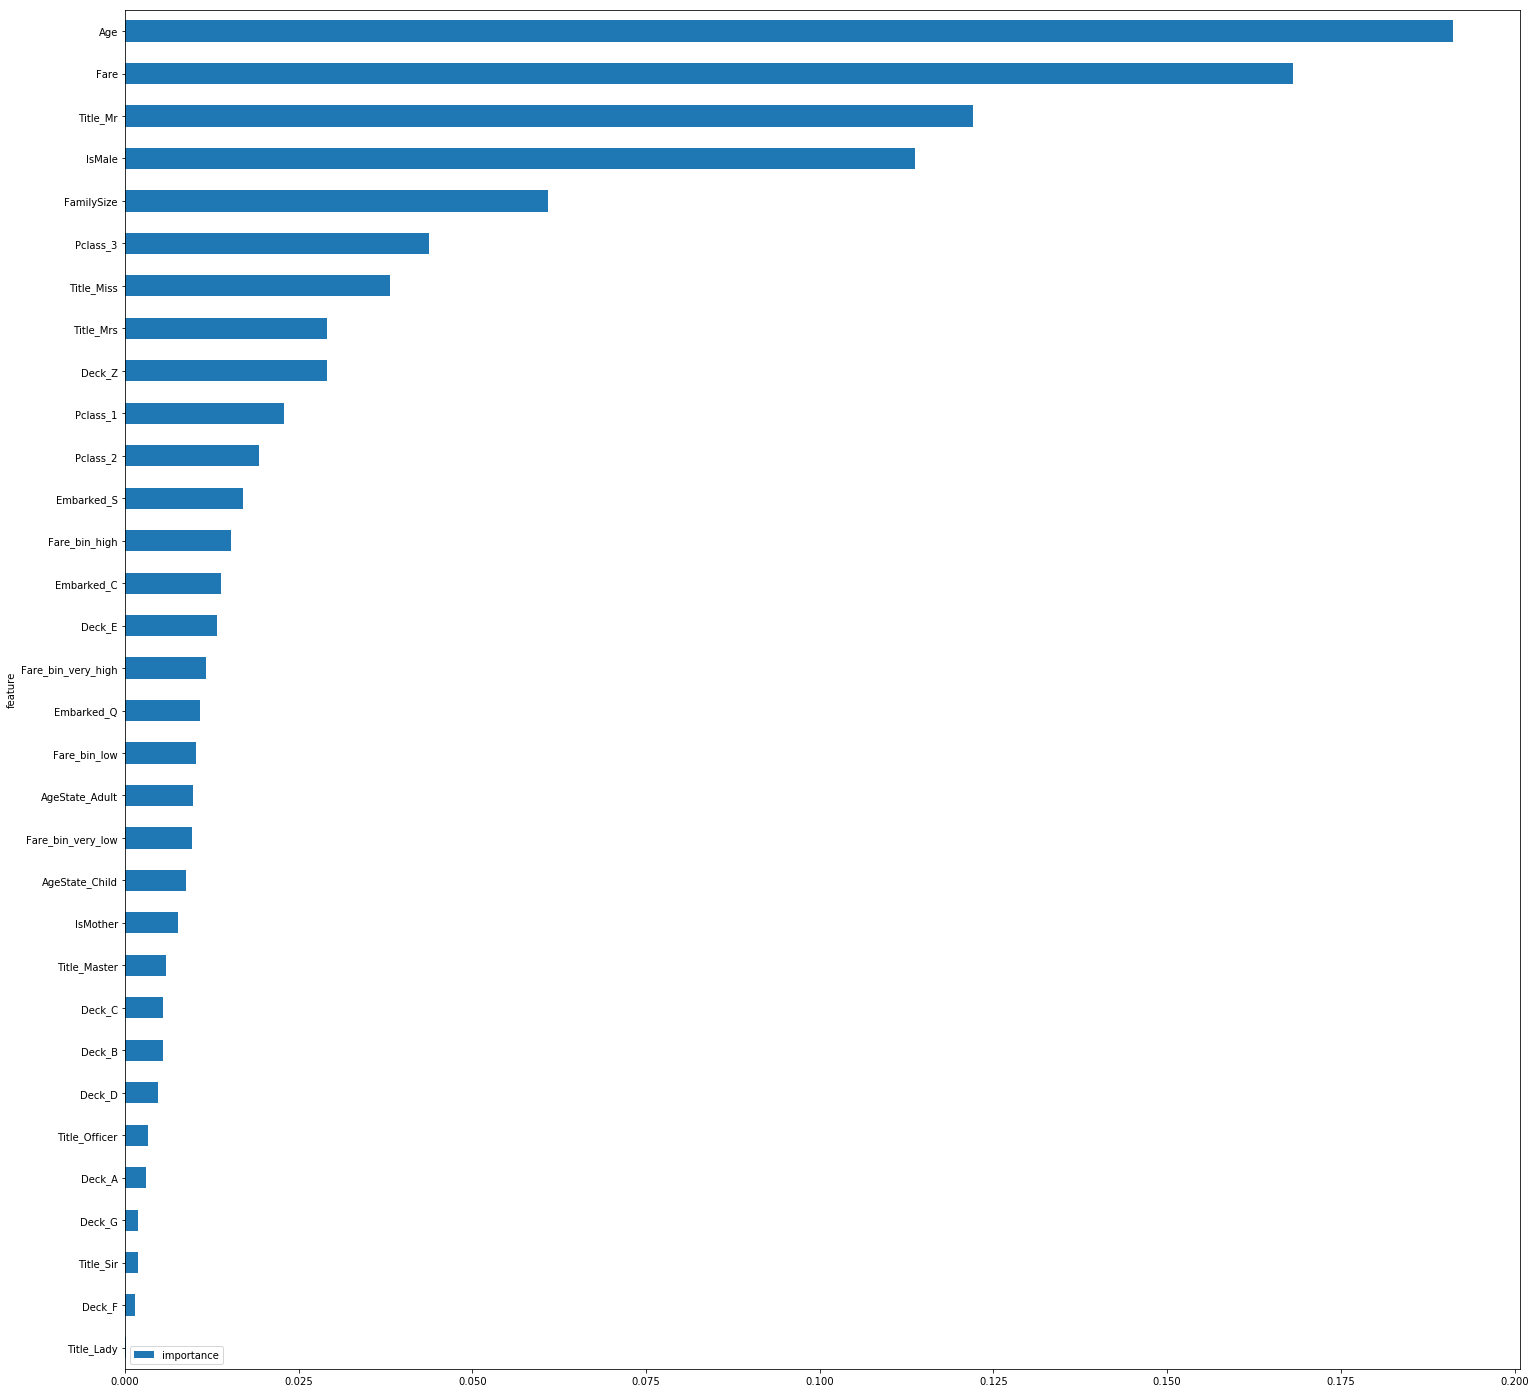

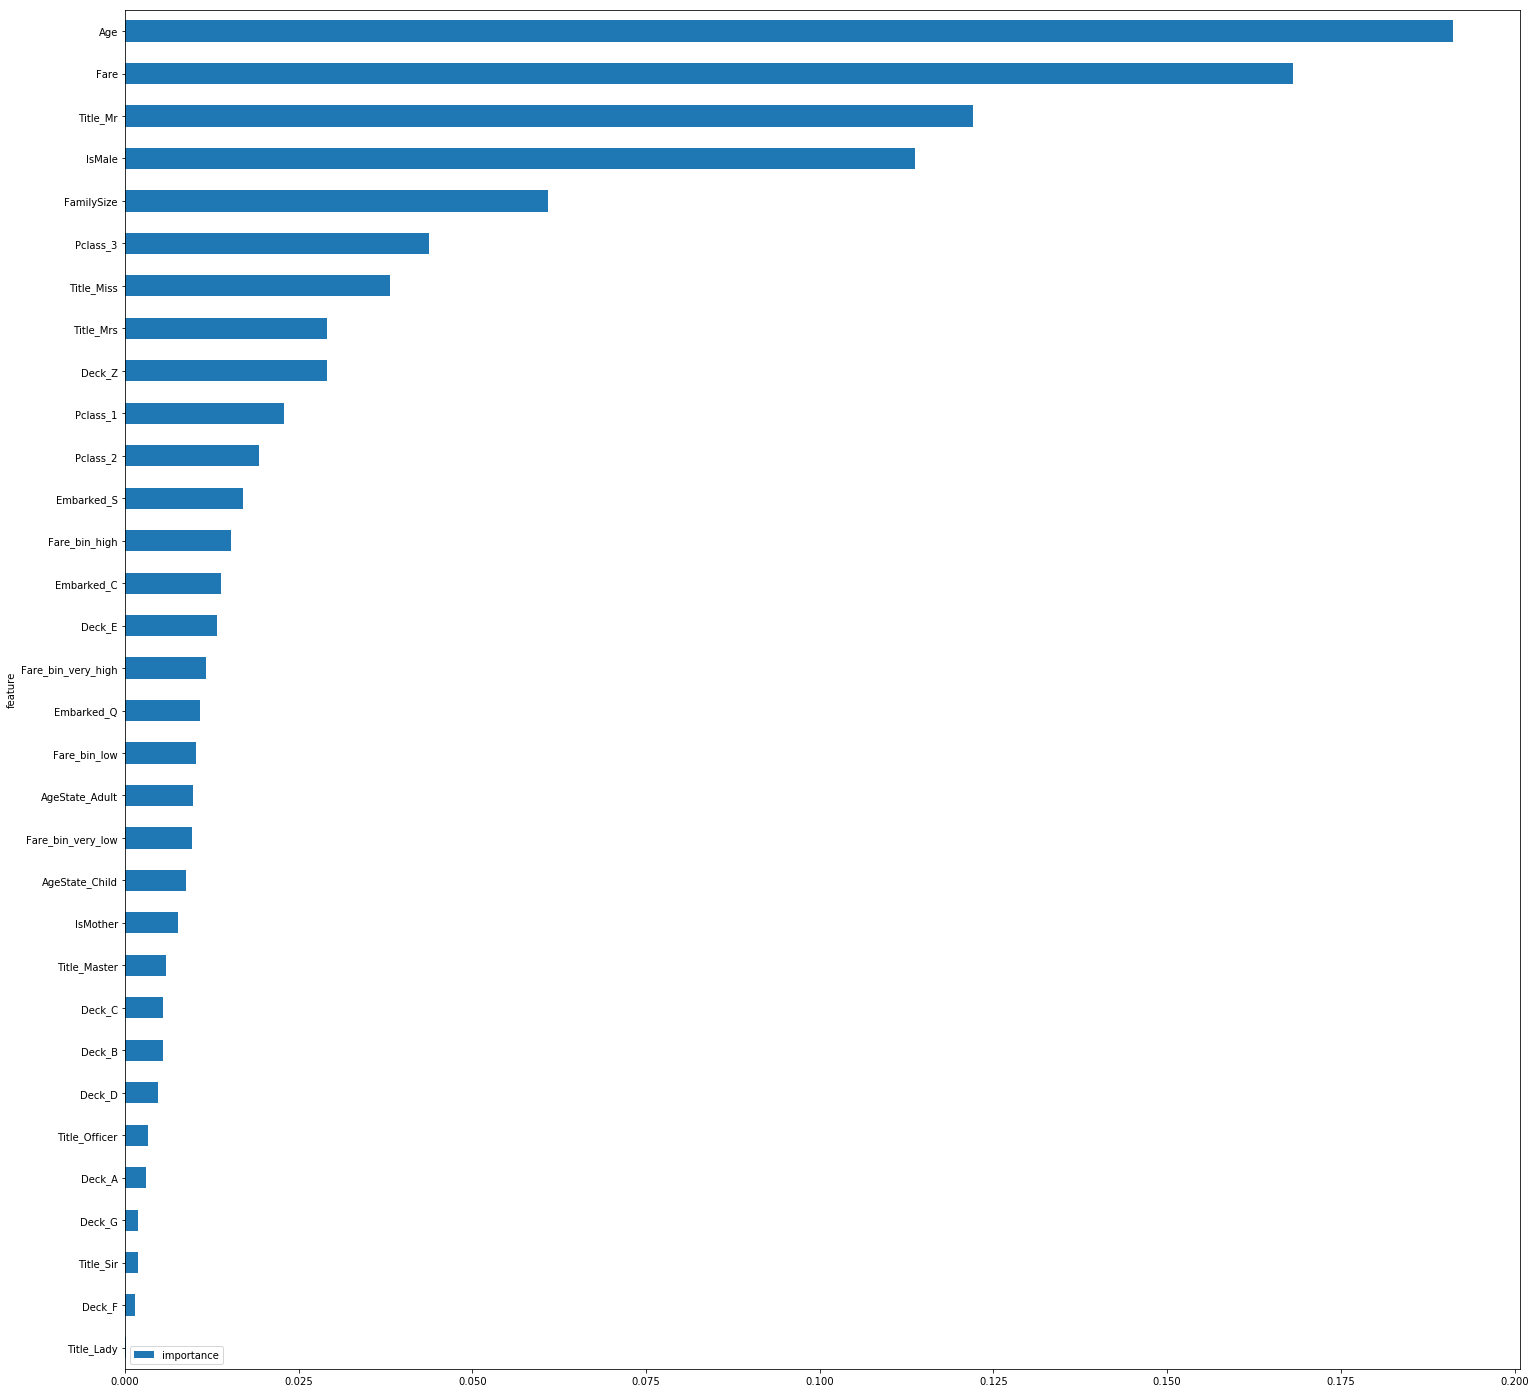

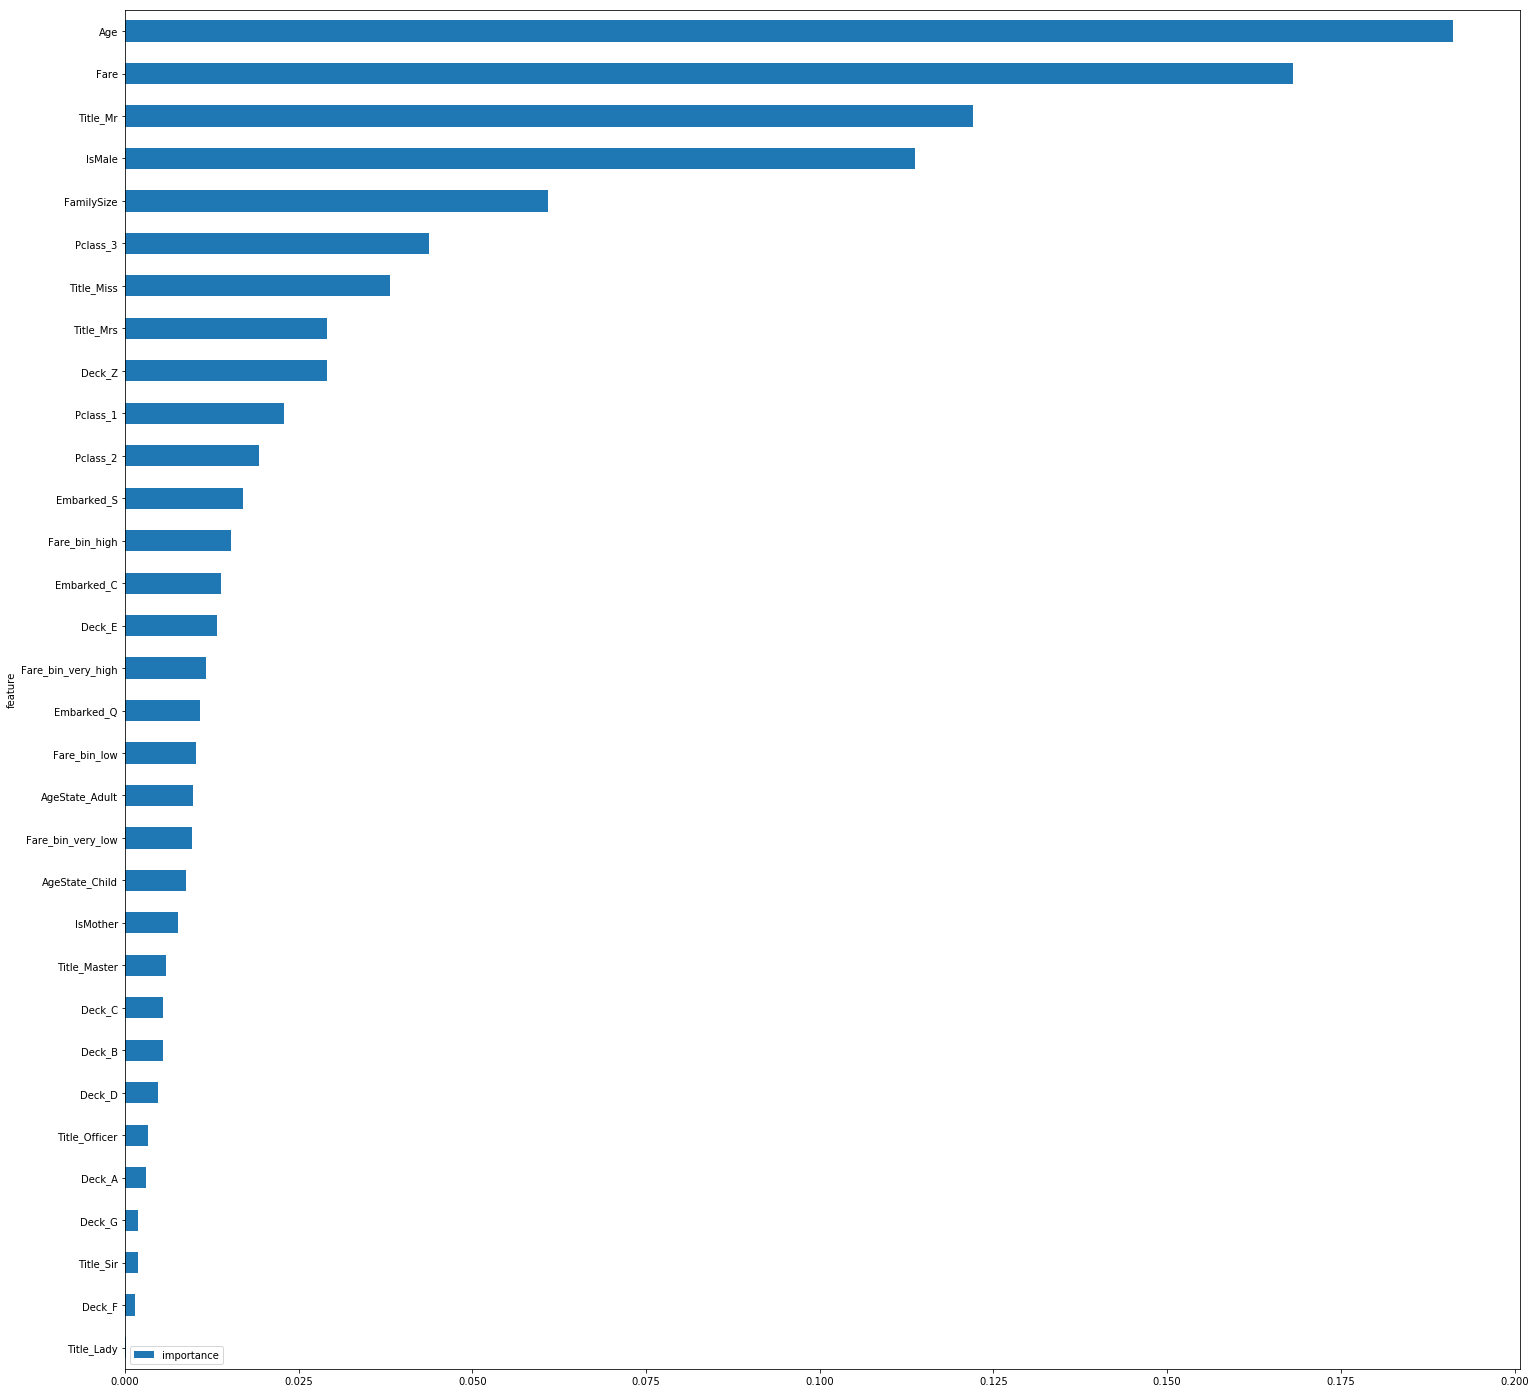

In [116]:
import matplotlib.pyplot as plt
feat.plot(kind='barh', figsize=(25, 25))
plt.show()


In [133]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

In [126]:
for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    model.fit(X_train,y_train)
    score = model.score(X=X_test, y=y_test)
    print('CV score = {0}'.format(score))
    print('***')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
CV score = 0.8324022346368715
***
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>
CV score = 0.8268156424581006
***
Cross-validation of : <class 'sklearn.ensemble.forest.RandomForestClassifier'>
CV score = 0.8268156424581006
***
Cross-validation of : <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
CV score = 0.8491620111731844
***


In [137]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search = GridSearchCV(forest,n_jobs=-1,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 651 tasks      | elapsed:   16.3s


Best score: 0.8398876404494382
Best parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   38.5s finished


In [138]:
model.score(X_test,y_test)

0.6145251396648045

In [152]:
lr = LogisticRegression()
params = {'C':list(np.linspace(0.01,100,10000,dtype=float)),'penalty':['l1','l2']}
clf = GridSearchCV(lr, param_grid=params, cv=10,n_jobs=-1)
clf.fit(X_train_scaled, y_train)
print(clf.best_params_)


{'C': 0.15000000000000002, 'penalty': 'l1'}


In [154]:
metrics.accuracy_score(y_test,clf.predict(X_test_scaled))

0.8268156424581006

In [155]:
get_submission_file(clf,"log_reg_final.csv")